In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import IterativeImputer
from scipy.stats import chi2_contingency

In [437]:
train_df = pd.read_csv('https://drive.google.com/uc?id=1wxCp6PAORF3Aqvodz0hiYGq0s-U87JZs')
test_df = pd.read_csv('https://drive.google.com/uc?id=1ukd3fPEjolsCFSCqZGltCe37VZfFIBCv')

entire_dataset = pd.concat([train_df, test_df], ignore_index=True)

In [438]:
train_df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [439]:
test_df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown


In [440]:
print(train_df.duplicated(keep='first').sum())
print(test_df.duplicated(keep='first').sum())

0
0


In [441]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

In [442]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5211 non-null   int64  
 1   age        5045 non-null   float64
 2   job        5055 non-null   object 
 3   marital    5192 non-null   object 
 4   education  5211 non-null   object 
 5   location   2449 non-null   object 
 6   default    5211 non-null   object 
 7   balance    4964 non-null   float64
 8   housing    5211 non-null   object 
 9   loan       5211 non-null   object 
 10  contact    5121 non-null   object 
 11  day        5211 non-null   int64  
 12  month      5211 non-null   object 
 13  duration   5211 non-null   int64  
 14  campaign   5022 non-null   float64
 15  pdays      5211 non-null   int64  
 16  previous   5172 non-null   float64
 17  poutcome   5211 non-null   object 
dtypes: float64(4), int64(4), object(10)
memory usage: 732.9+ KB


In [443]:
train_df.isna().sum()

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [444]:
train_df.describe(include=['object'])

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


In [445]:
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(train_df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 

y
['no' 'yes'] 



job
blue-collar      8313
management       8093
technician       6512
services         3550
admin.           2718
retired          1947
administrator    1711
self-employed    1347
entrepreneur     1259
unemployed       1092
housemaid        1061
student           809
unknown           239
Name: count, dtype: int64


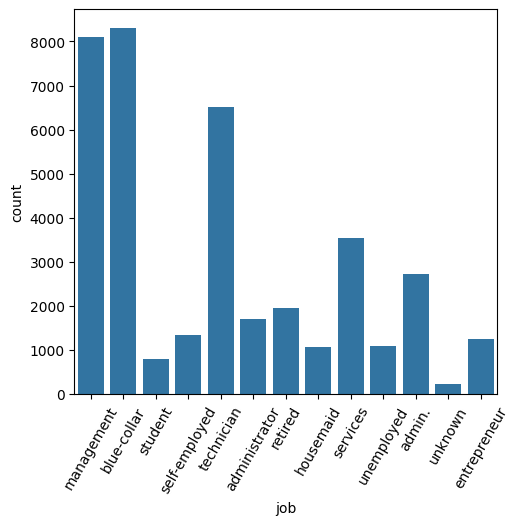

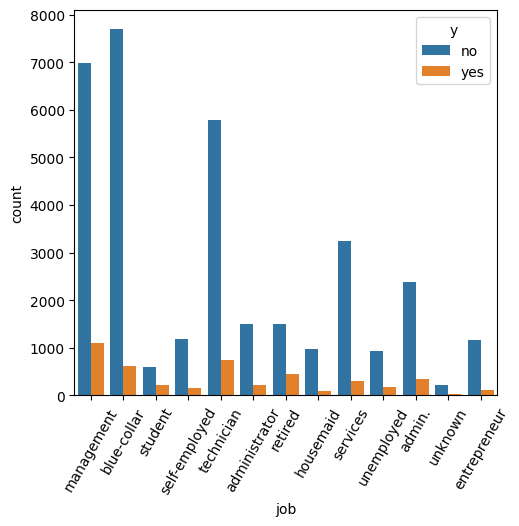

In [446]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='job')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='job', hue='y')

contagem_jobs = train_df['job'].value_counts()

print(contagem_jobs)

<Axes: xlabel='education', ylabel='count'>

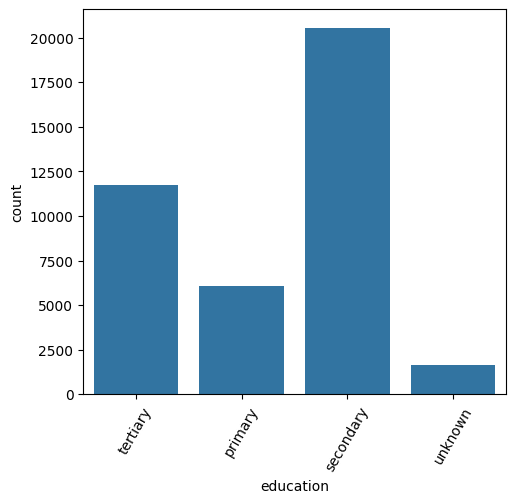

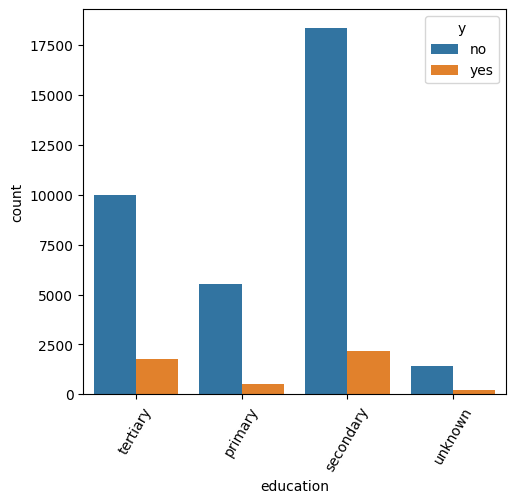

In [447]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='education')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='education', hue='y')

<Axes: xlabel='marital', ylabel='count'>

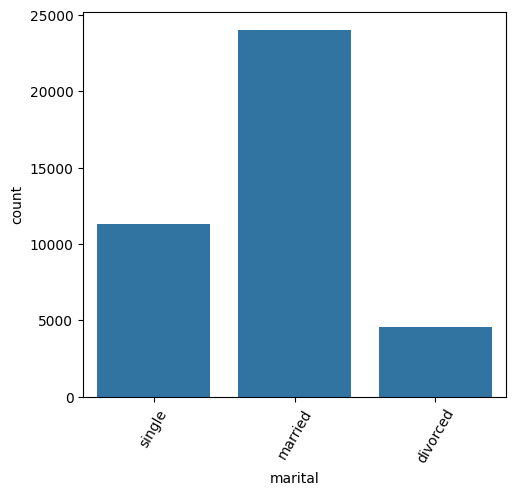

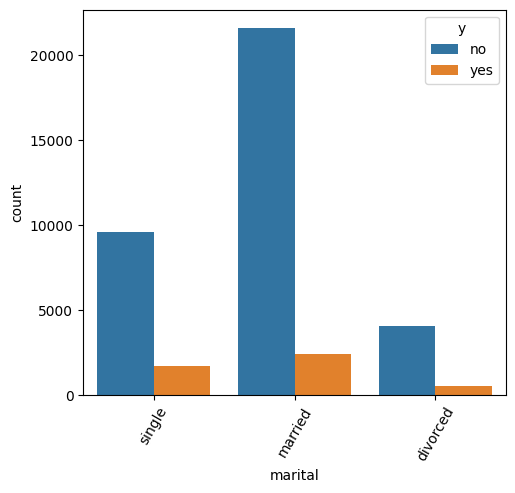

In [448]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='marital')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='marital', hue='y')

<Axes: xlabel='location', ylabel='count'>

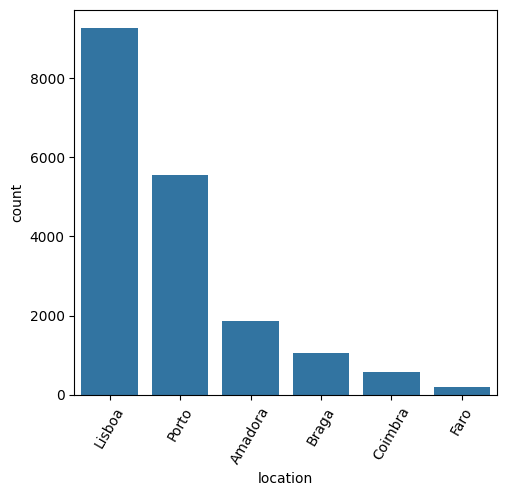

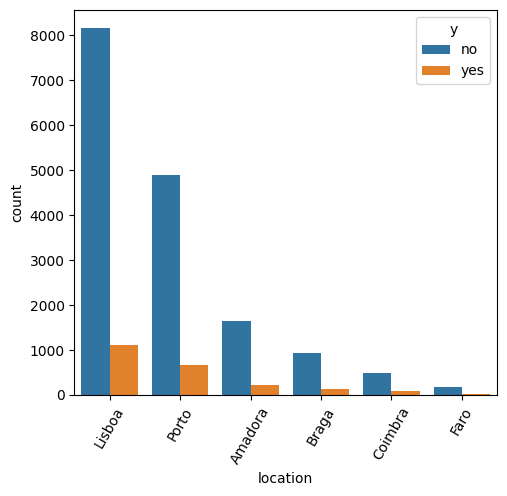

In [449]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='location')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='location', hue='y')

<Axes: xlabel='loan', ylabel='count'>

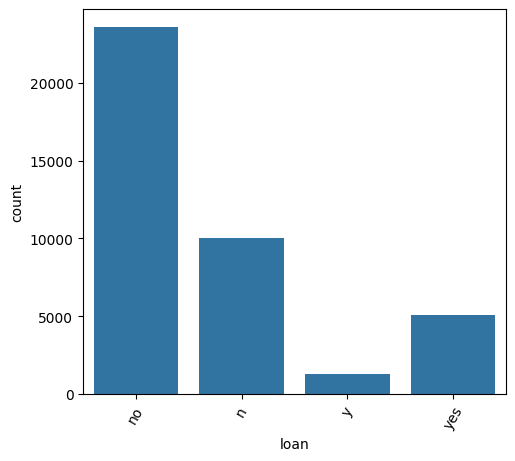

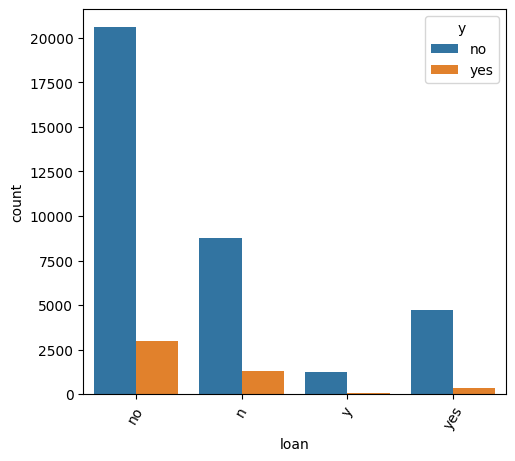

In [450]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='loan')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='loan', hue='y')

<Axes: xlabel='contact', ylabel='count'>

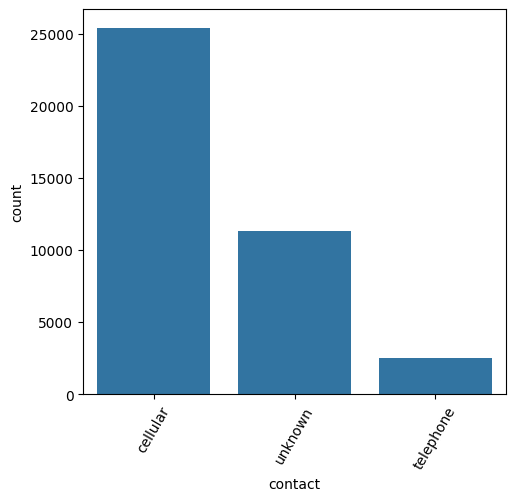

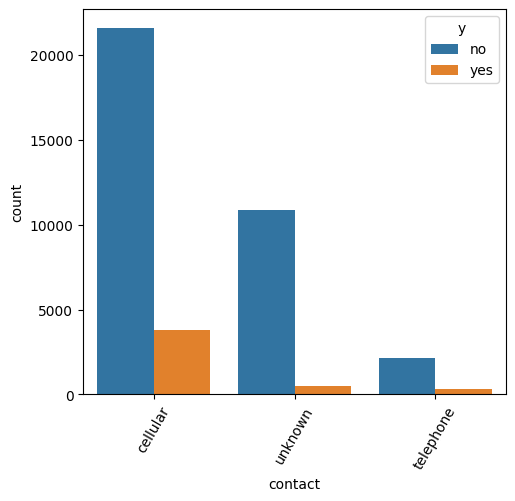

In [451]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='contact')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='contact', hue='y')

In [452]:
train_df.describe().round(2)

,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [453]:
train_df["id"].nunique()

40000

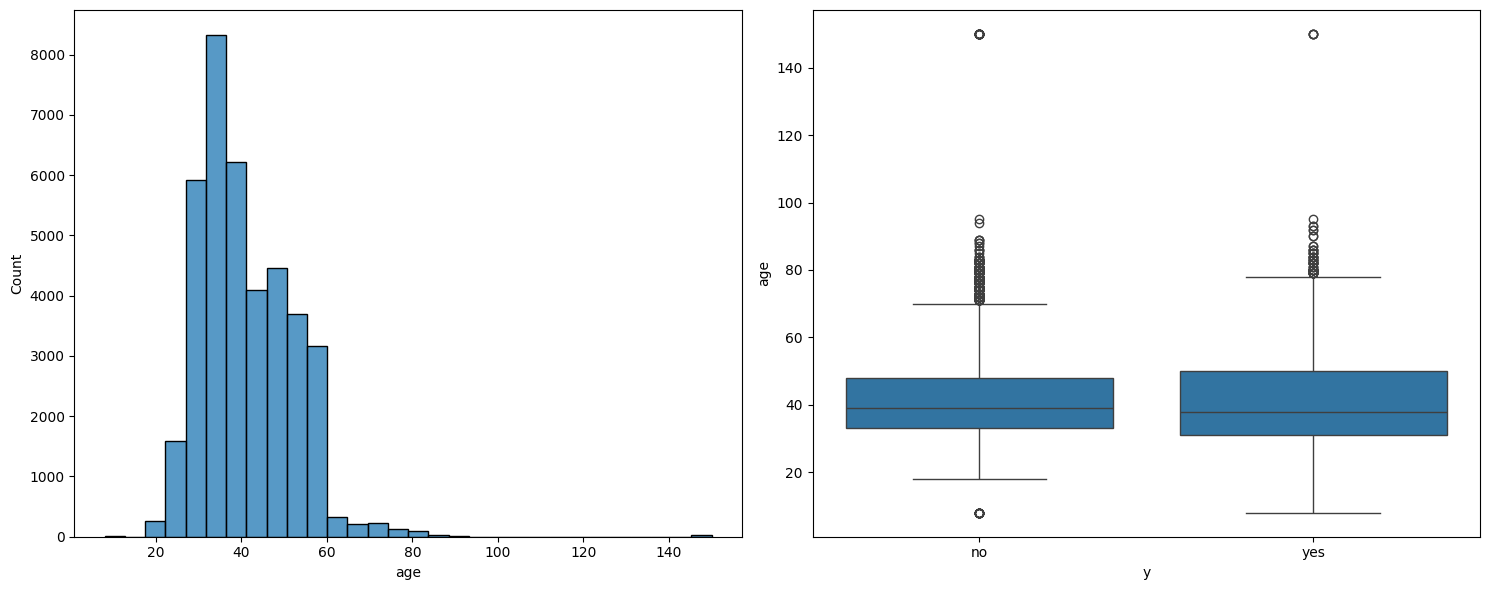

In [454]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='age', bins=30)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='age')

plt.tight_layout()
plt.show()

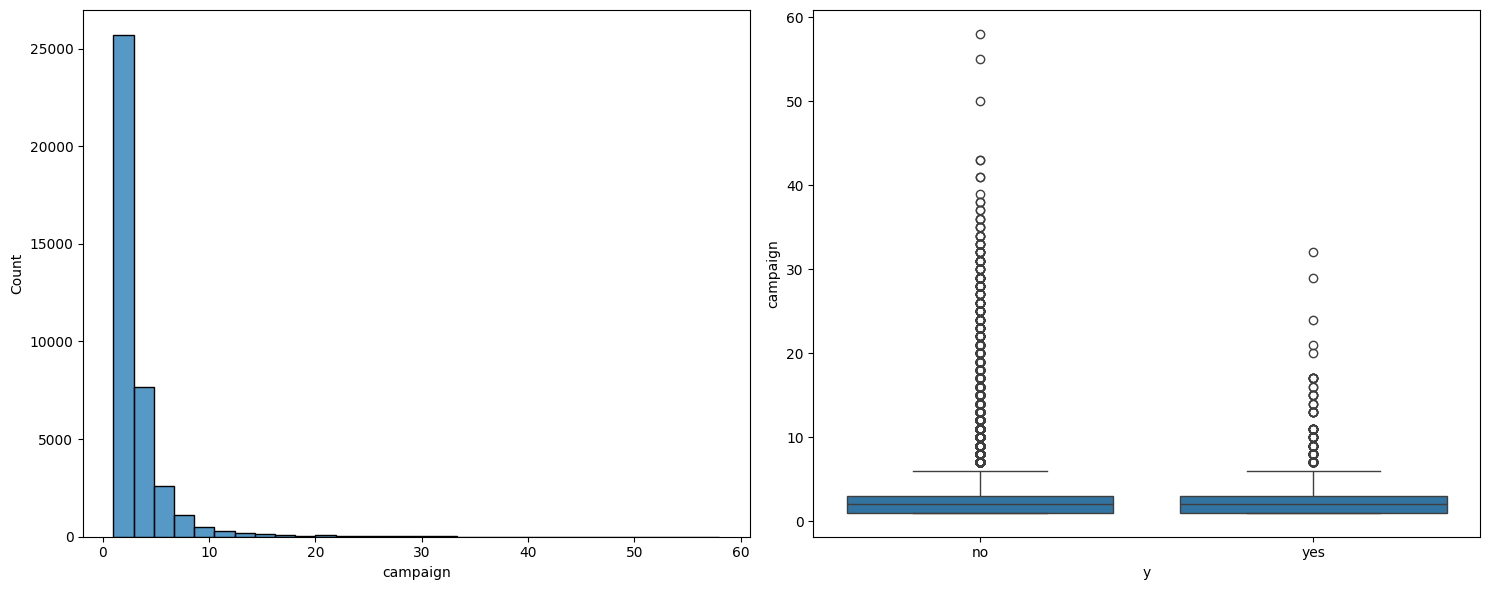

In [455]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='campaign', bins=30)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='campaign')

plt.tight_layout()
plt.show()

In [456]:
# Odd ages

age_below_14 = train_df[train_df['age'] < 16].shape[0] # Some minors hire services with their parents' consent, but with minors under 14?
age_above_122 = train_df[train_df['age'] > 100].shape[0] # The oldest person who ever lived died at 122 

print(f"Quantidade de pessoas com menos de 14 anos: {age_below_14}")
print(f"Quantidade de pessoas com mais de 122 anos: {age_above_122}")

minors_below_14 = train_df[train_df['age'] < 16]

unique_professions_below_14 = minors_below_14['job'].unique()

print("Profissões das pessoas com menos de 14 anos:")
for profession in unique_professions_below_14:
    print(profession)


Quantidade de pessoas com menos de 14 anos: 17
Quantidade de pessoas com mais de 122 anos: 27
Profissões das pessoas com menos de 14 anos:
blue-collar
technician
management
housemaid
retired
admin.
unemployed
student


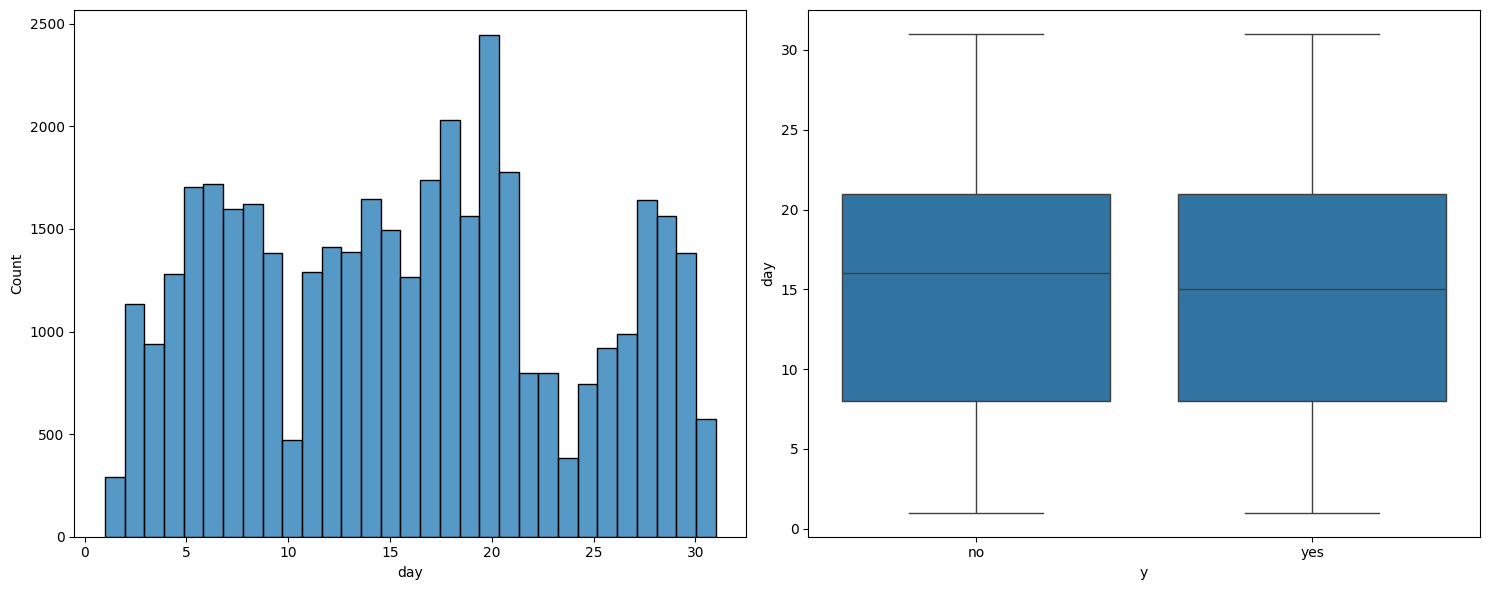

In [457]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='day', bins=31)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='day')

plt.tight_layout()
plt.show()

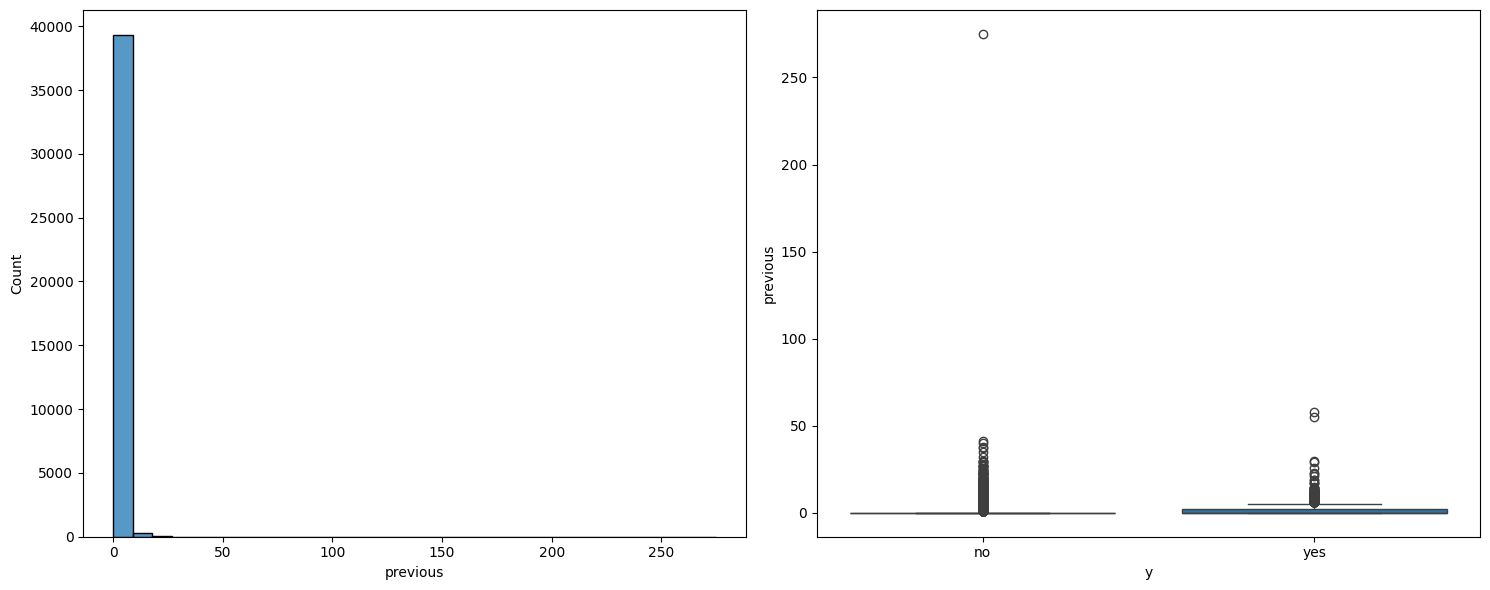

In [458]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='previous', bins=31)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='previous')

plt.tight_layout()
plt.show()

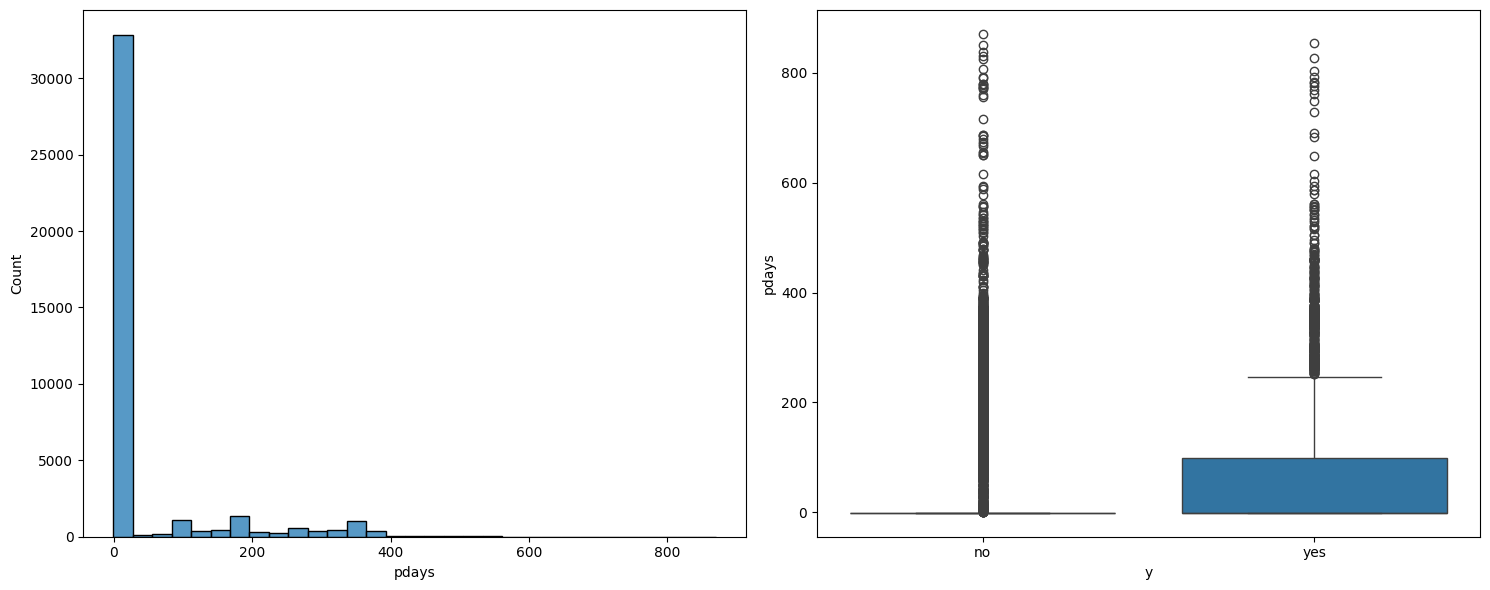

In [459]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='pdays', bins=31)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='pdays')

plt.tight_layout()
plt.show()

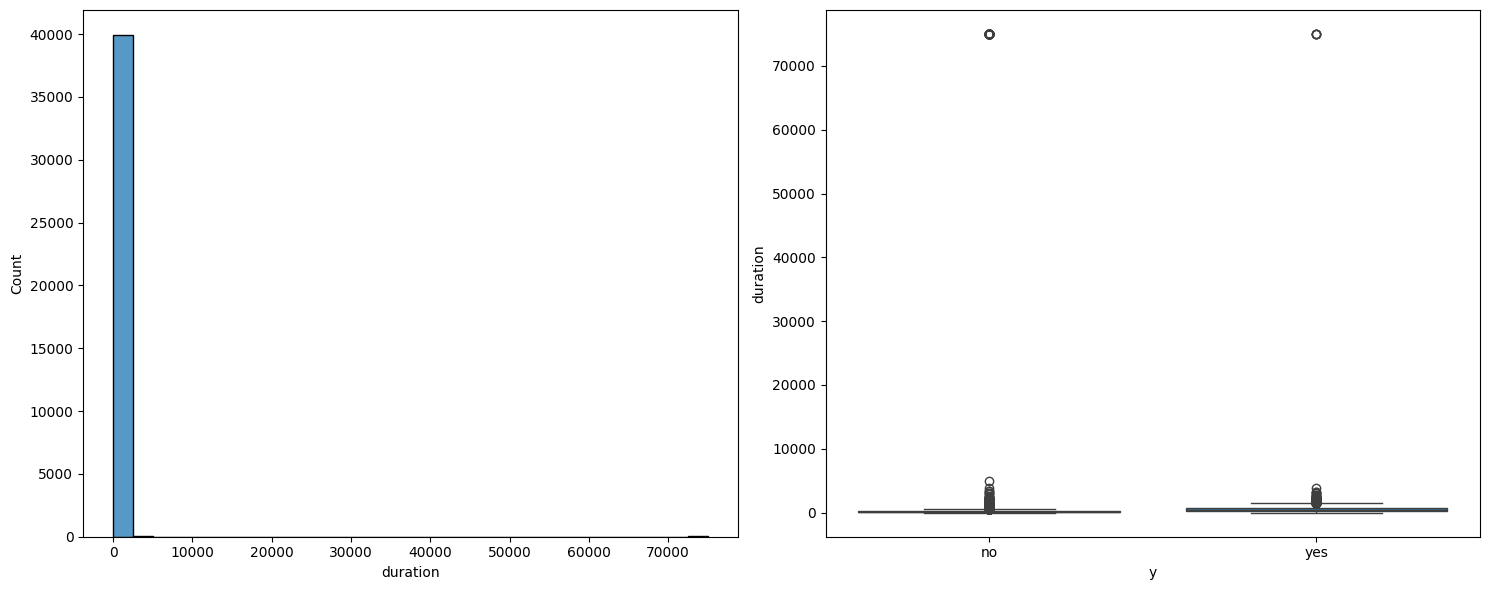

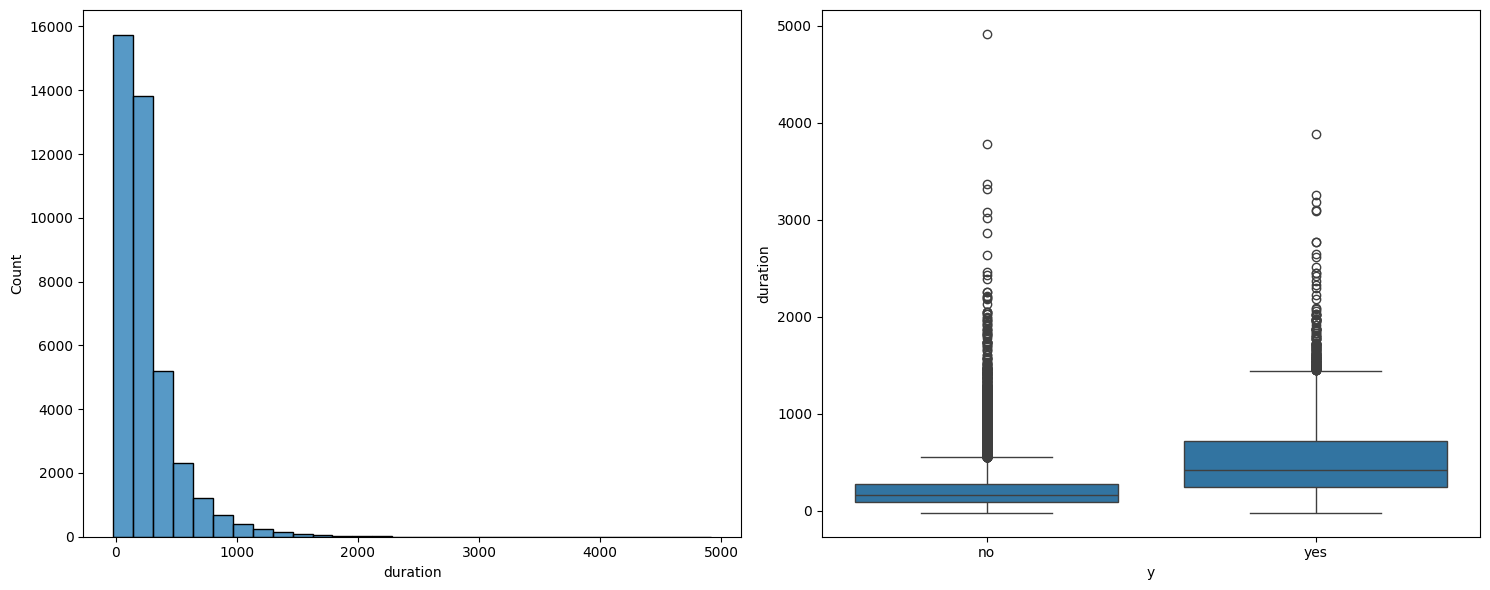

In [460]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df[train_df["duration"] < 10**5], x='duration', bins=30)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df[train_df["duration"] < 10**5], x='y', y='duration')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df[train_df["duration"] < 10**4], x='duration', bins=30)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df[train_df["duration"] < 10**4], x='y', y='duration')

plt.tight_layout()
plt.show()

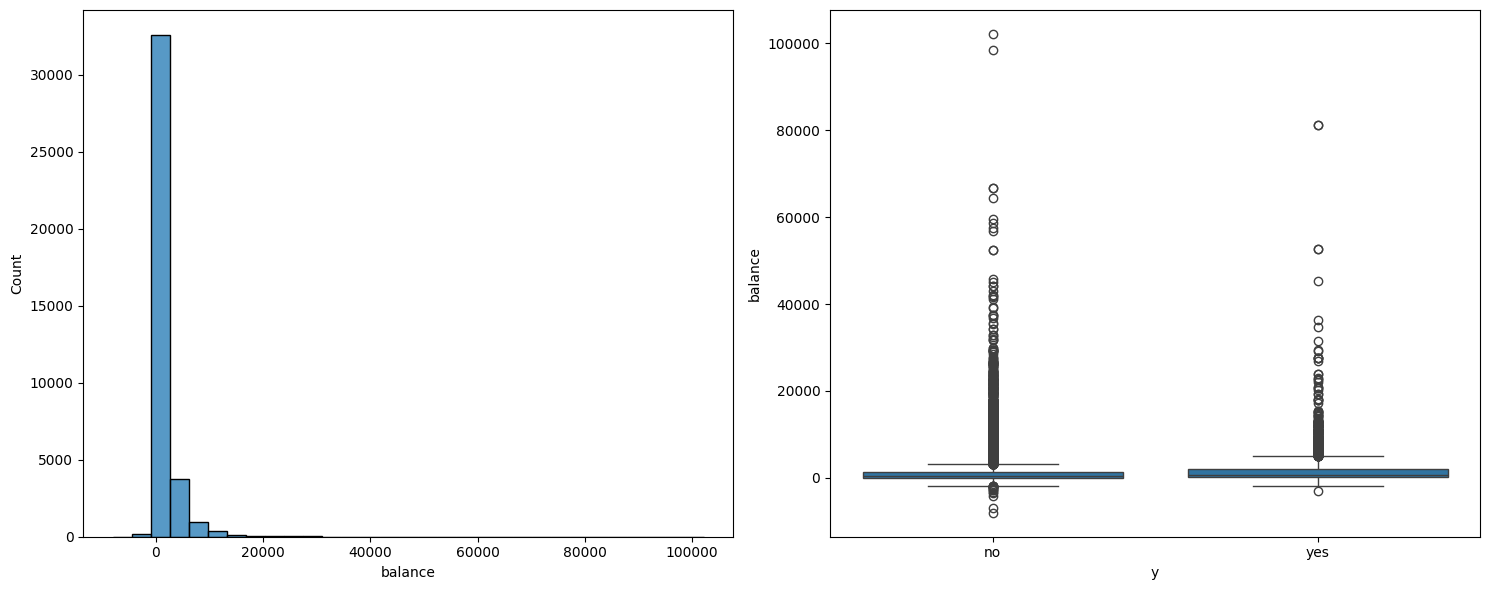

In [461]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='balance', bins=31)  

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='balance')

plt.tight_layout()
plt.show()

In [462]:
train_cleaning = train_df.copy()

In [463]:
(train_cleaning["duration"] > 300).sum()

10898

In [464]:
train_cleaning["job"] = train_df["job"].replace({"admin.": "administrator"})
train_cleaning["loan"] = train_df["loan"].replace({"n": "no", "y": "yes"})

train_cleaning["loan"].value_counts()

loan
no     33584
yes     6416
Name: count, dtype: int64

In [465]:
mode_marital = train_cleaning["marital"].mode()[0]
train_cleaning["marital"] = train_cleaning["marital"].fillna(mode_marital)
train_cleaning["marital"].value_counts()

marital
married     24106
single      11313
divorced     4581
Name: count, dtype: int64

In [466]:
mode_marital = train_cleaning["contact"].mode()[0]
train_cleaning["contact"] = train_cleaning["contact"].fillna(mode_marital)
train_cleaning["contact"].value_counts()

contact
cellular     26181
unknown      11318
telephone     2501
Name: count, dtype: int64

In [467]:
mode_marital = train_cleaning["previous"].mode()[0]
train_cleaning["previous"] = train_cleaning["previous"].fillna(mode_marital)
train_cleaning["previous"].value_counts()

previous
0.0      32705
1.0       2434
2.0       1867
3.0        998
4.0        640
5.0        410
6.0        240
7.0        186
8.0        124
9.0         77
10.0        59
11.0        55
12.0        40
13.0        35
14.0        18
15.0        17
17.0        14
16.0        12
19.0        11
20.0         7
23.0         6
18.0         6
22.0         6
27.0         5
24.0         4
21.0         4
30.0         3
29.0         3
26.0         2
25.0         2
40.0         1
37.0         1
41.0         1
275.0        1
28.0         1
58.0         1
55.0         1
35.0         1
38.0         1
32.0         1
Name: count, dtype: int64

In [468]:
inconsistent_outliers = (train_cleaning['duration'] > 5000) | (train_cleaning['duration'] < 0) | (train_cleaning['previous'] > 80) | (train_cleaning['age'] > 100) | (train_cleaning['age'] < 18)

train_cleaning = train_cleaning[~inconsistent_outliers]


In [469]:
train_cleaning.drop(['location', 'poutcome'], axis=1, inplace=True)

In [470]:
columns_for_imputation = ['age', 'balance', 'campaign']

mice_imputer = IterativeImputer(random_state=42)
train_cleaning[columns_for_imputation] = mice_imputer.fit_transform(train_cleaning[columns_for_imputation])


In [471]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  
    r, k = confusion_matrix.shape
    return (chi2 / (n * (min(r, k) - 1)))**0.5

categorical_features = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']  

for feature in categorical_features:
    confusion_matrix = pd.crosstab(train_cleaning['job'], train_cleaning[feature])
    cramers_v_value = cramers_v(confusion_matrix)
    print(f'Cramér\'s V entre job e {feature}: {cramers_v_value:.2f}')


Cramér's V entre job e marital: 0.21
Cramér's V entre job e education: 0.46
Cramér's V entre job e default: 0.04
Cramér's V entre job e housing: 0.28
Cramér's V entre job e loan: 0.11
Cramér's V entre job e contact: 0.15
Cramér's V entre job e month: 0.11


In [472]:
missing_jobs = train_cleaning['job'].isnull()

job_mode_per_education = train_cleaning.groupby('education')['job'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

def impute_job(row):
    if pd.isnull(row['job']):
        return job_mode_per_education[row['education']]
    else:
        return row['job']

train_cleaning['job'] = train_cleaning.apply(impute_job, axis=1)

print(train_cleaning['job'].isnull().sum())

0


In [473]:
train_cleaning['age'] = train_cleaning['age'].astype(int)
train_cleaning['campaign'] = train_cleaning['campaign'].astype(int)
train_cleaning['previous'] = train_cleaning['previous'].astype(int)

In [474]:
categorical_features = train_cleaning.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(train_cleaning[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' 'unknown'
 'entrepreneur'] 

marital
['single' 'married' 'divorced'] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'yes'] 

contact
['cellular' 'unknown' 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

y
['no' 'yes'] 



In [475]:
train_cleaning.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [476]:
train_cleaning.describe().round(2)

,id,age,balance,day,duration,campaign,pdays,previous
count,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00
mean,19994.82,40.88,1362.87,15.82,258.35,2.72,40.38,0.57
std,11548.23,10.47,2992.60,8.33,256.41,2.99,100.27,1.89
min,0.00,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,9994.00,33.00,86.00,8.00,103.00,1.00,-1.00,0.00
50%,19987.00,39.00,503.00,16.00,181.00,2.00,-1.00,0.00
75%,30000.00,48.00,1452.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,95.00,102127.00,31.00,4918.00,58.00,871.00,58.00


In [477]:
train_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39697 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         39697 non-null  int64  
 1   age        39697 non-null  int64  
 2   job        39697 non-null  object 
 3   marital    39697 non-null  object 
 4   education  39697 non-null  object 
 5   default    39697 non-null  object 
 6   balance    39697 non-null  float64
 7   housing    39697 non-null  object 
 8   loan       39697 non-null  object 
 9   contact    39697 non-null  object 
 10  day        39697 non-null  int64  
 11  month      39697 non-null  object 
 12  duration   39697 non-null  int64  
 13  campaign   39697 non-null  int64  
 14  pdays      39697 non-null  int64  
 15  previous   39697 non-null  int64  
 16  y          39697 non-null  object 
dtypes: float64(1), int64(7), object(9)
memory usage: 5.5+ MB


In [478]:
(train_cleaning['job'] == 'unknown').sum()

237

In [479]:
(train_cleaning['education'] == 'unknown').sum()

1627

In [480]:
(train_cleaning['contact'] == 'unknown').sum()

11233